<a href="https://colab.research.google.com/github/Srijan2024/oibsip_taskno/blob/main/EMAIL_SPAM_CLASSIFICATION__TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
dataset .columns
dataset.shape

dataset.drop_duplicates(inplace = True)
dataset.shape
print (pd.DataFrame(dataset.isnull().sum()))

               0
v1             0
v2             0
Unnamed: 2  5126
Unnamed: 3  5159
Unnamed: 4  5164


In [3]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
dataset.rename(columns = {'v1':'label', 'v2':'text'}, inplace = True)

In [5]:
dataset=dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [6]:
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
pip install nltk

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
dataset=dataset.dropna()

In [11]:
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
dataset['text']=dataset['text'].map(lambda text: text[1:])
dataset['text'] = dataset['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=dataset['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [13]:
corpus.values

array(['jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'k lar joke wif u oni',
       'ree entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
       ..., 'iti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'ofl true name'], dtype=object)

In [14]:
dataset['text'].values

array([list(['o', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']),
       list(['k', 'lar', 'joking', 'wif', 'u', 'oni']),
       list(['ree', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's']),
       ...,
       list(['ity', 'was', 'in', 'mood', 'for', 'that', 'so', 'any', 'other', 'suggestions']),
       list(['he', 'guy', 'did', 'some', 'bitching', 'but', 'i', 'acted', 'like', 'i', 'd', 'be', 'interested', 'in', 'buying', 'something', 'else', 'next', 'week', 'and', 'he', 'gave', 'it', 'to', 'us', 'for', 'free']),
       list(['ofl', 'its', 'true', 'to', 'its', 'name'])], dtype=object)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# X = cv.fit_transform(corpus.values).toarray()
X = cv.fit_transform(corpus.values)
y = dataset['label']

In [16]:
X

<5169x7516 sparse matrix of type '<class 'numpy.int64'>'
	with 42969 stored elements in Compressed Sparse Row format>

In [17]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5169, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
X_train[0]

<1x7516 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# accuracy_score(y_test, y_pred,normalize=False)

0.9700193423597679

In [23]:
cm

array([[887,  23],
       [  8, 116]])

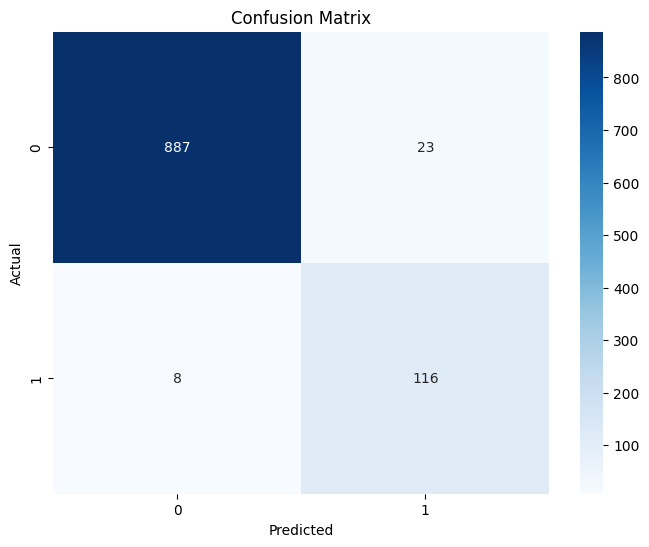

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

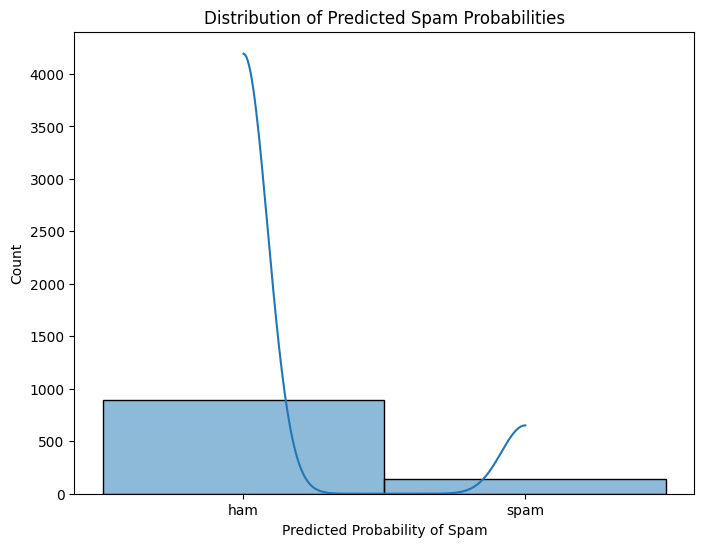

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=20, kde=True)
plt.xlabel('Predicted Probability of Spam')
plt.ylabel('Count')
plt.title('Distribution of Predicted Spam Probabilities')
plt.show()